In [28]:
import pandas as pd
import numpy as np
# Conjunto Iris
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('https://bit.ly/38XWXS4', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
# sepal length & petal length de las primeras 100 entradas
# Iris-setosa & Iris-versicolor
X = df.iloc[:100,[0,2]].values
# Cambiando etiquetas de texto a números
y = df.iloc[:100, 4].values
y = np.array(np.where(y=='Iris-setosa',-1,1))
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

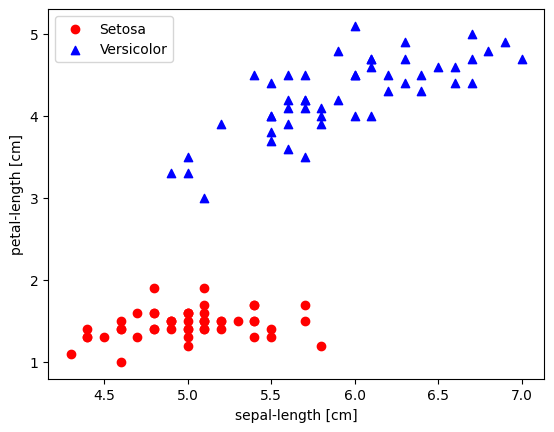

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0],X[:50,1], color ='red', marker='o',label='Setosa')
plt.scatter(X[50:,0],X[50:,1], color ='blue', marker='^',label='Versicolor')
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc='upper left')
plt.show()

In [31]:
# Perceptrón
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=.1, random_state=1)
ppn.fit(X, y)
print(ppn.intercept_,ppn.coef_)

[-0.1] [[-0.28  0.7 ]]


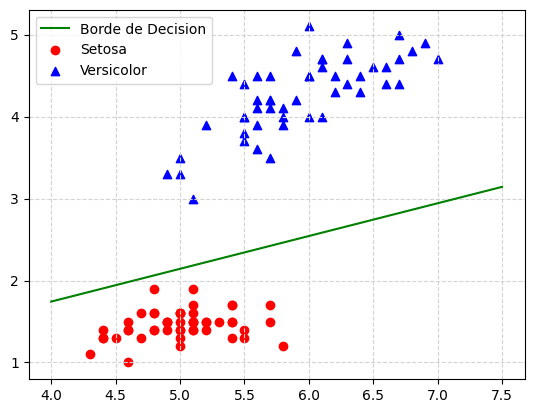

In [32]:
#        w0  +   w1 * x1   +    w2 * x2  =  0
# intercept_ + coef_[0][0]*x1 + coef_[0][1]*x2
# => x2 = -(w0 + w1*x1) / w2
# Borde de decision
x1 = np.linspace(4, 7.5, 2)
x2 = -(ppn.intercept_ + ppn.coef_[0][0]*x1) / ppn.coef_[0][1]
plt.plot(x1, x2, 'g', label = "Borde de Decision")
# Clase -1 : setosa
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],color='red',marker='o', label='Setosa')
# Clase 1 : versicolor
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',marker='^', label='Versicolor')
plt.legend()
plt.grid(color='lightgray', linestyle='--')

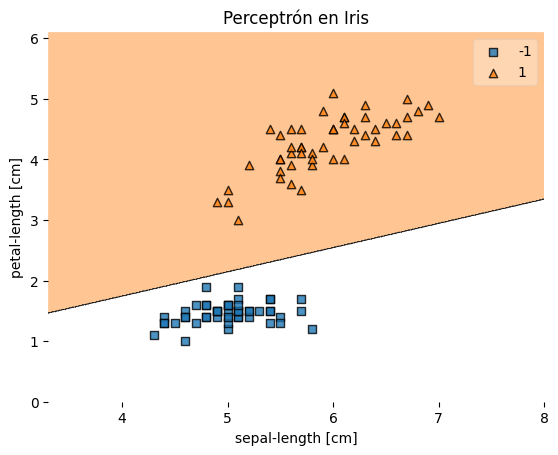

In [33]:
from mlxtend.plotting import plot_decision_regions
# Regiones de decisión
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptrón en Iris')
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.show()

In [34]:
# Con sklearn
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [35]:
X = iris.data[:, [2,3]]
y = iris.target[:]
print('Etiquetas : ',np.unique(y))

Etiquetas :  [0 1 2]


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [37]:
print('Total de etiquetas en y       :', np.bincount(y))
print('Total de etiquetas en y_train :', np.bincount(y_train))
print('Total de etiquetas en y_test  :', np.bincount(y_test))

Total de etiquetas en y       : [50 50 50]
Total de etiquetas en y_train : [35 35 35]
Total de etiquetas en y_test  : [15 15 15]


In [38]:
# Estandarización
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Perceptrón
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=.1, random_state=1)
# Ajuste y evaluación
ppn.fit(X_train_std, y_train)
print('Exactitud : ',ppn.score(X_test_std,y_test))

Exactitud :  0.9777777777777777


In [41]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print('Exactitud : ',accuracy_score(y_test,y_pred))

Exactitud :  0.9777777777777777


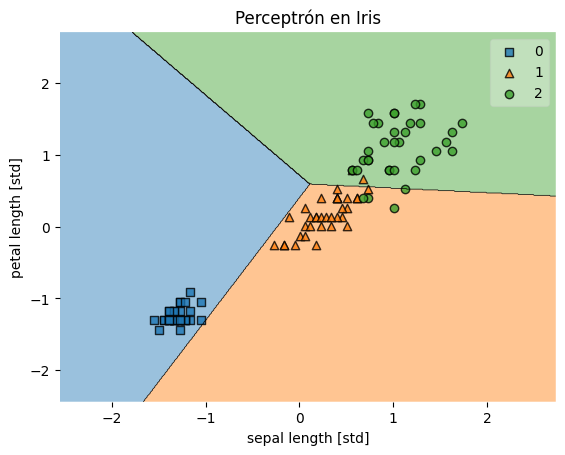

In [42]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Regiones de decisión (entrenamiento)
plot_decision_regions(X_train_std, y_train, clf=ppn)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Perceptrón en Iris')
plt.show()

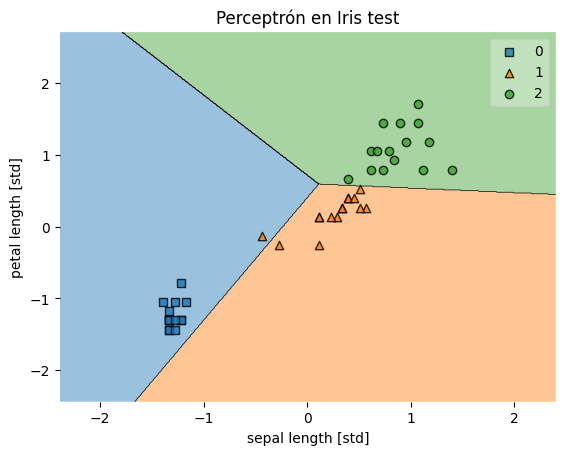

In [43]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Regiones de decisión (entrenamiento)
plot_decision_regions(X_test_std, y_test, clf=ppn)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Perceptrón en Iris test')
plt.show()

In [ ]:
# Regresión Logística

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Sigmoide
"""
def sigmoide(z):
  return
"""

In [ ]:
"""
z = np.arange(-7,7,0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1])
ax = plt.gca() # gca =  get current axis
ax.yaxis.grid(True)
plt.show()
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
"""
lr = LogisticRegression() # C => inverso de la regularización
                                  # valor pequeño => reglurarización más fuerte
lr.fit(X_train_std, y_train)
"""

In [ ]:
"""
y_pred = lr.predict(X_test_std)
print('Exactitud : ',lr.score(X_test_std,y_test))

In [ ]:
# Regiones de decisión (entrenamiento)
plot_decision_regions(X_train_std, y_train, clf=lr)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresión Logística en Iris')
plt.show()

In [ ]:
# Regiones de decisión (pruebas)
plot_decision_regions(X_test_std, y_test, clf=lr)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresión Logística en Iris')
plt.show()

In [ ]:
# Máquina de soporte vectorial

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Modelo y ajuste
"""
svm = SVC()
svm.fit(X_train_std, y_train)
"""
# Regiones de decisión (entrenamiento)
plot_decision_regions(X_train_std, y_train, clf=svm, legend=2)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('SVM en Iris')
plt.show()

In [ ]:
# Regiones de decisión (pruebas)
plot_decision_regions(X_test_std, y_test, clf=svm, legend=2)
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('SVM en Iris (pruebas)')
plt.show()